In [1]:
# Import Packages
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
#Loading the dataset
df=pd.read_csv('Movie.csv',encoding='latin-1')

In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
#dropping irrelevant columns
df= df.drop(columns=['Name','Year','Duration','Votes'])

In [7]:
df.isnull().sum()

Genre       1877
Rating      7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
#Imputation for completing missing values using k-Nearest Neighbors.
knn_imputer = KNNImputer(n_neighbors=2)
df['Rating']=knn_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].apply(lambda x: round(x, 1))


E:\faihacondaenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

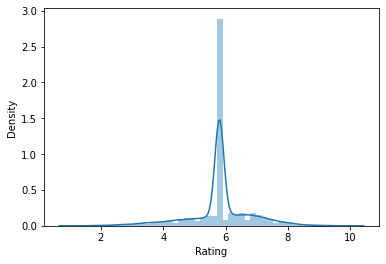

In [9]:
#plotting distribution of Rating
import seaborn as sns
sns.distplot(df['Rating'])

In [10]:
#Checking for null values
df.isnull().sum()

Genre       1877
Rating         0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
#Removing null values
df=df.dropna()
df.isnull().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

                                 Genre  Rating                 Director  \
9              Action, Crime, Thriller     4.0        Biju Bhaskar Nair   
34                              Action     3.5            Mohibul Haque   
39                     Horror, Mystery     4.1  Dharmendra Suresh Desai   
43                  Action, Drama, War     8.1              Amrit Sagar   
44                            Thriller     4.0                 Aziz Zee   
...                                ...     ...                      ...   
15462                    Comedy, Drama     2.7            Rajiv S. Ruia   
15470  Documentary, Biography, Musical     8.2               Sandip Ray   
15471                           Comedy     3.7            Karan Kashyap   
15476                    Comedy, Drama     8.2              Zoya Akhtar   
15487        Action, Adventure, Family     4.0         Satyajit Bhatkal   

                Actor 1           Actor 2           Actor 3  
9             Augustine      Fathima 

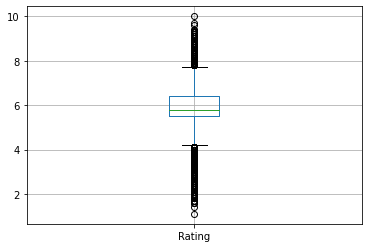

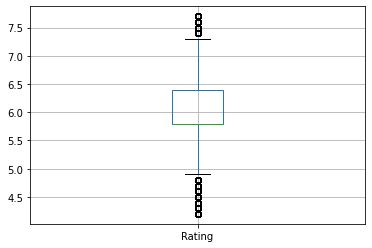

In [12]:
#Outlier detection 
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]
print(outliers)
#boxplot to show outliers
df.boxplot(column=['Rating'])
plt.show()
#Outlier removal
df = df[(df['Rating'] > lower_bound) & (df['Rating'] < upper_bound)]



In [13]:
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,5.8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,5.8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...
15502,Action,5.8,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
# Splitting genres because multiple genres are present
df['Genre'] = df['Genre'].str.split(',')

# Use get_dummies for one-hot encoding
genre_dummies = df['Genre'].str.join('|').str.get_dummies()

# Concatenate the one-hot encoded genre columns with the original DataFrame
df = pd.concat([df, genre_dummies], axis=1)

In [15]:
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Action,Adventure,Biography,Comedy,...,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War
0,[Drama],5.8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[Drama],7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Drama, Musical]",5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Romance]",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[Drama],5.8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,[Action],5.8,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15503,"[Action, Crime, Drama]",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15504,[Action],4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,"[Action, Drama]",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.drop('Genre', axis=1, inplace=True)

In [17]:
#Label encoding
cat_cols=['Director','Actor 1','Actor 2','Actor 3']
le=LabelEncoder()
for i in cat_cols:
    df[i]= le.fit_transform(df[i])
df.dtypes

Rating         float64
Director         int32
Actor 1          int32
Actor 2          int32
Actor 3          int32
 Action          int64
 Adventure       int64
 Biography       int64
 Comedy          int64
 Crime           int64
 Drama           int64
 Family          int64
 Fantasy         int64
 History         int64
 Horror          int64
 Music           int64
 Musical         int64
 Mystery         int64
 Reality-TV      int64
 Romance         int64
 Sci-Fi          int64
 Sport           int64
 Thriller        int64
 War             int64
 Western         int64
Action           int64
Adventure        int64
Animation        int64
Biography        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Family           int64
Fantasy          int64
History          int64
Horror           int64
Music            int64
Musical          int64
Mystery          int64
Reality-TV       int64
Romance          int64
Sci-Fi           int64
Sport      

In [18]:
x= df.drop(labels='Rating',axis=1)
y= df['Rating']
#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [19]:
#Linear regression
lm=LinearRegression()
lm=lm.fit(x_train,y_train)
#Train data prediction
train_pred=lm.predict(x_train)
#Test data prediction
test_pred=lm.predict(x_test)

RMSE_test=np.sqrt(mean_squared_error(y_test,test_pred))
RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
print('RMSE trainingdata : ', str(RMSE_train))
print('RMSE testdata : ', str(RMSE_test))
#calculating errors
errors=abs(test_pred-y_test)
#calculating mean absolute percent error
mape=100*(errors/y_test)
#accuracy
accuracy= 100-np.mean(mape)
print('Accuracy: ', round(accuracy,2),'%')

RMSE trainingdata :  0.7163929664569505
RMSE testdata :  0.7317862410825556
Accuracy:  90.52 %


In [20]:
#RandomForestRegressor
RF=RandomForestRegressor().fit(x_train,y_train)
#Train data prediction
train_preds1=RF.predict(x_train)
#Test data prediction
test_preds1=RF.predict(x_test)

RMSE_test=np.sqrt(mean_squared_error(y_test,test_preds1))
RMSE_train=np.sqrt(mean_squared_error(y_train,train_preds1))
print('RMSE trainingdata : ', str(RMSE_train))
print('RMSE testdata : ', str(RMSE_test))
#calculating errors
errors=abs(test_preds1-y_test)
#calculating mean absolute percent error
mape=100*(errors/y_test)
#accuracy
accuracy= 100-np.mean(mape)
print('Accuracy: ', round(accuracy,2),'%')


RMSE trainingdata :  0.2702796564944938
RMSE testdata :  0.7418270488553628
Accuracy:  90.46 %


In [21]:
#DecisionTreeRegressor
DT=DecisionTreeRegressor().fit(x_train,y_train)
#Train data prediction
train_preds2=RF.predict(x_train)
#Test data prediction
test_preds2=RF.predict(x_test)

RMSE_test=np.sqrt(mean_squared_error(y_test,test_preds2))
RMSE_train=np.sqrt(mean_squared_error(y_train,train_preds2))
print('RMSE trainingdata : ', str(RMSE_train))
print('RMSE testdata : ', str(RMSE_test))
#calculating errors
errors=abs(test_preds2-y_test)
#calculating mean absolute percent error
mape=100*(errors/y_test)
#accuracy
accuracy= 100-np.mean(mape)
print('Accuracy: ', round(accuracy,2),'%')

RMSE trainingdata :  0.2702796564944938
RMSE testdata :  0.7418270488553628
Accuracy:  90.46 %


In [22]:
#KNN
KN=KNeighborsRegressor().fit(x_train,y_train)
#Train data prediction
train_preds3=KN.predict(x_train)
#Test data prediction
test_preds3=KN.predict(x_test)

RMSE_test=np.sqrt(mean_squared_error(y_test,test_preds3))
RMSE_train=np.sqrt(mean_squared_error(y_train,train_preds3))
print('RMSE trainingdata : ', str(RMSE_train))
print('RMSE testdata : ', str(RMSE_test))
#calculating errors
errors=abs(test_preds3-y_test)
#calculating mean absolute percent error
mape=100*(errors/y_test)
#accuracy
accuracy= 100-np.mean(mape)
print('Accuracy: ', round(accuracy,2),'%')

RMSE trainingdata :  0.6582869158127764
RMSE testdata :  0.809833814944397
Accuracy:  89.2 %


In [23]:
#XGBoost model
from xgboost import XGBRegressor
XG = XGBRegressor().fit(x_train, y_train)

# Making predictions
test_preds4 = XG.predict(x_test)
train_preds4 = XG.predict(x_train)

RMSE_test=np.sqrt(mean_squared_error(y_test,test_preds4))
RMSE_train=np.sqrt(mean_squared_error(y_train,train_preds4))
print('RMSE trainingdata : ', str(RMSE_train))
print('RMSE testdata : ', str(RMSE_test))
#calculating errors
errors=abs(test_preds4-y_test)
#calculating mean absolute percent error
mape=100*(errors/y_test)
#accuracy
accuracy= 100-np.mean(mape)
print('Accuracy: ', round(accuracy,2),'%')

RMSE trainingdata :  0.44653177850103104
RMSE testdata :  0.7416023894868907
Accuracy:  90.26 %
